In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [69]:
df = pd.read_csv("/content/Agrofood_co2_emission.csv")

### 데이터셋 정보 확인

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [71]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167,2593947,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490,2763167,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568,2985663,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090,3237009,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115,3482604,7733458.0,7722096.0,2500.768729,0.372250


In [72]:
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission', 'Average Temperature'],
      dtype='object')

### 데이터셋 변형

In [75]:
new_df = pd.DataFrame()
new_df['Year'] = df['Year']
new_df['Temperature'] = df['Average Temperature']
new_df['Fires'] = df[['Savanna fires', 'Forest fires', 'Fires in organic soils', 'Fires in humid tropical forests']].sum(axis=1)
new_df['Forest'] = df[['Forestland', 'Net Forest conversion']].sum(axis=1)
new_df['Agriculture'] = df[['Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 'Pesticides Manufacturing']].sum(axis=1)
new_df['Food'] = df[['Food Transport', 'Food Household Consumption', 'Food Retail', 'Food Processing', 'Food Packaging', 'Agrifood Systems Waste Disposal']].sum(axis=1)
new_df['Farming'] = df[['On-farm Electricity Use', 'Fertilizers Manufacturing', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'On-farm energy use']].sum(axis=1)
new_df['Industry'] = df['IPPU']
new_df['Rural Ratio'] = df['Rural population'] / (df['Rural population'] + df['Urban population'])
new_df['Total'] = df['total_emission']
new_df = new_df[['Temperature'] + [col for col in new_df.columns if col != 'Temperature']]
new_df

,Temperature,Year,Fires,Forest,Agriculture,Food,Farming,Industry,Rural Ratio,Total
0,0.536167,1990,14.7794,-2388.803,903.415183,1263.479256,2196.114900,209.9778,0.788234,2198.963539
1,0.020667,1991,14.7794,-2388.803,899.369173,1289.046656,2292.445600,217.0388,0.787345,2323.876629
2,-0.259583,1992,14.7794,-2388.803,894.246173,1323.778956,2290.187100,222.1156,0.786452,2356.304229
3,0.101917,1993,14.7794,-2388.803,928.529573,1332.660356,2280.098500,201.2057,0.785559,2368.470529
4,0.372250,1994,14.7794,-2388.803,959.361473,1384.957656,2348.182700,182.2905,0.784662,2500.768729
...,...,...,...,...,...,...,...,...,...,...
6960,1.120250,2016,1422.5157,87162.739,153.353900,2362.726200,6530.709547,858.9820,0.677042,98491.026350
6961,0.046500,2017,1562.2731,87162.739,183.572000,2349.414900,5011.887553,889.4250,0.677629,97159.311550
6962,0.516333,2018,1779.2052,87162.739,184.123400,2507.223500,5068.752105,966.2650,0.677915,97668.308200
6963,0.985667,2019,1762.6311,87162.739,126.289600,2528.517400,6461.943699,945.9420,0.677900,98988.062800


In [76]:
new_df = new_df.dropna()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6222 entries, 0 to 6964
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  6222 non-null   float64
 1   Year         6222 non-null   int64  
 2   Fires        6222 non-null   float64
 3   Forest       6222 non-null   float64
 4   Agriculture  6222 non-null   float64
 5   Food         6222 non-null   float64
 6   Farming      6222 non-null   float64
 7   Industry     6222 non-null   float64
 8   Rural Ratio  6222 non-null   float64
 9   Total        6222 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 534.7 KB


In [77]:
new_df.head()

,Temperature,Year,Fires,Forest,Agriculture,Food,Farming,Industry,Rural Ratio,Total
0,0.536167,1990,14.7794,-2388.803,903.415183,1263.479256,2196.1149,209.9778,0.788234,2198.963539
1,0.020667,1991,14.7794,-2388.803,899.369173,1289.046656,2292.4456,217.0388,0.787345,2323.876629
2,-0.259583,1992,14.7794,-2388.803,894.246173,1323.778956,2290.1871,222.1156,0.786452,2356.304229
3,0.101917,1993,14.7794,-2388.803,928.529573,1332.660356,2280.0985,201.2057,0.785559,2368.470529
4,0.372250,1994,14.7794,-2388.803,959.361473,1384.957656,2348.1827,182.2905,0.784662,2500.768729


### 단순통계량

In [78]:
from scipy.stats import skew, kurtosis
df = new_df
statistics = pd.DataFrame({
    'Mean': df.mean(),
    'Standard Deviation': df.std(),
    'Skewness': df.apply(lambda x: skew(x)),
    'Kurtosis': df.apply(lambda x: kurtosis(x))
})

statistics

,Mean,Standard Deviation,Skewness,Kurtosis
Temperature,0.880986,0.564213,0.356704,0.852379
Year,2005.137416,8.889953,-0.009339,-1.196507
Fires,4426.153883,27233.652777,20.321705,591.548499
Forest,-221.446745,106855.095935,1.360632,48.836744
Agriculture,9697.894256,31146.241975,5.994435,40.689031
Food,22146.683338,90476.026833,8.846153,91.294363
Farming,14627.727654,49562.121699,7.299284,58.368112
Industry,19991.498032,111420.853900,11.240701,144.117680
Rural Ratio,0.443004,0.240634,-0.038772,-1.022975
Total,70668.510416,240712.162153,7.415780,66.715645


### 정규성 검정

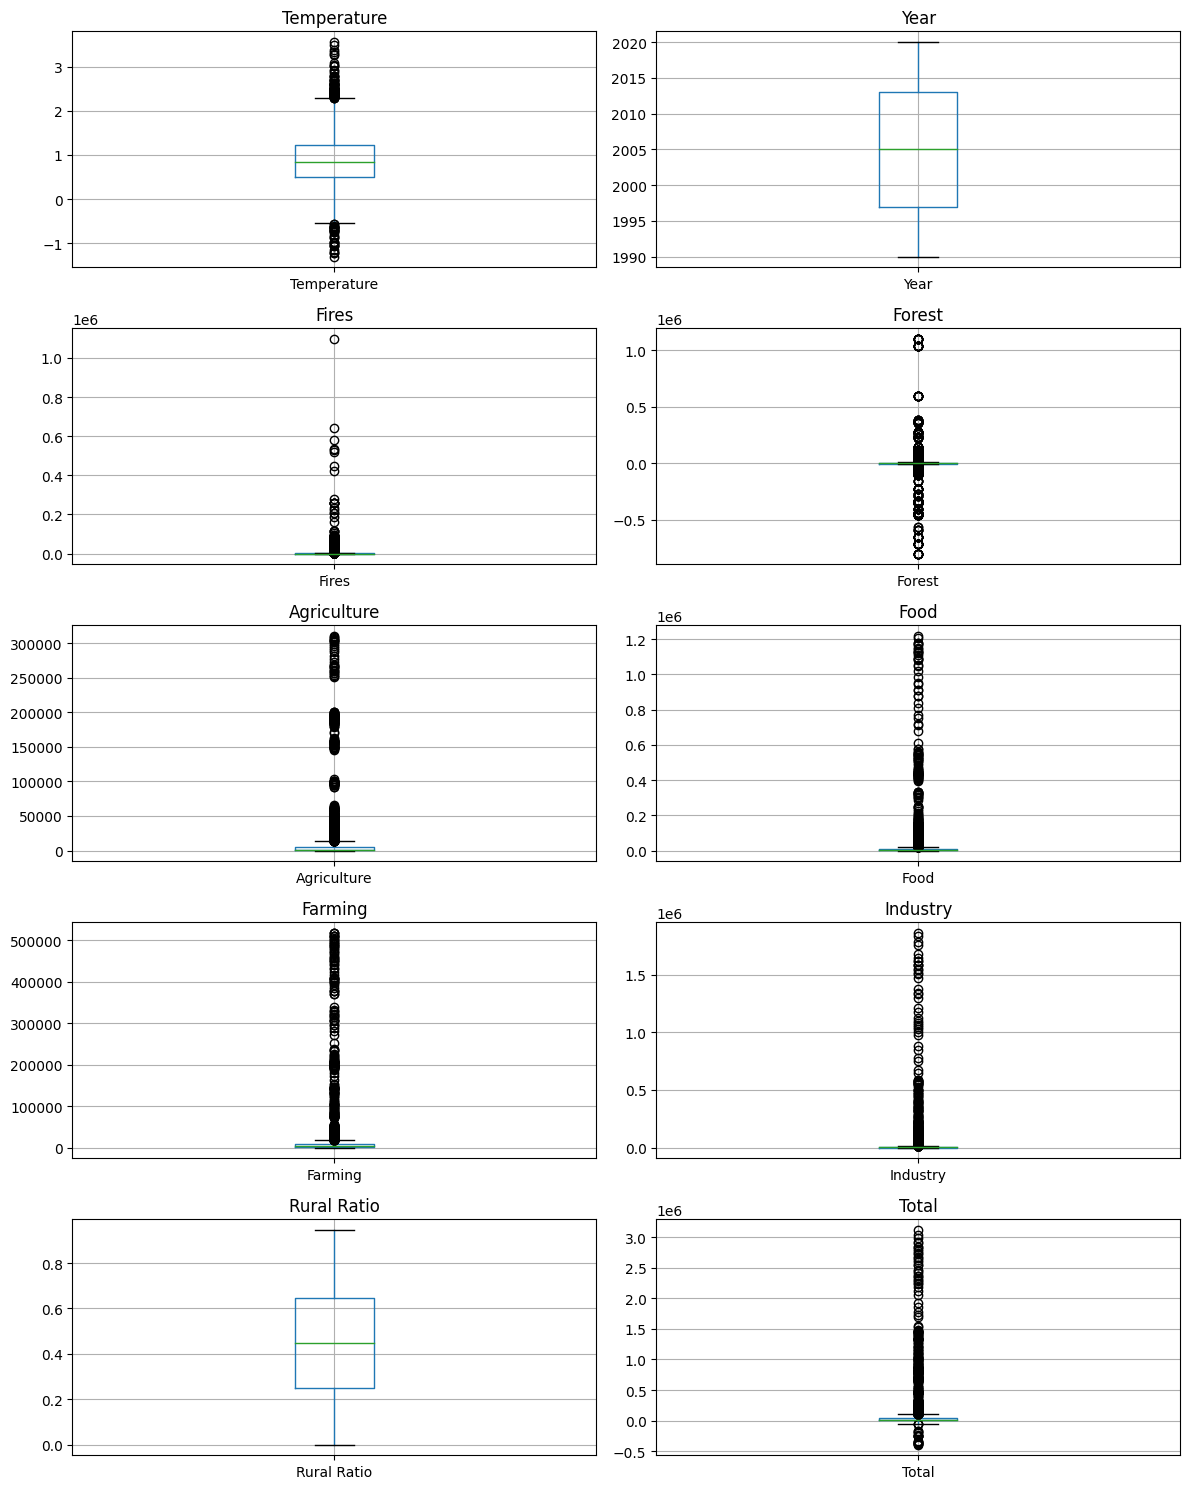

In [79]:
n_vars = len(df.columns)
n_rows = n_vars // 2 + n_vars % 2
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(12, n_rows*3))

for i, col in enumerate(df.columns):
    row = i // 2
    col_in_row = i % 2
    df.boxplot(column=[col], ax=axes[row, col_in_row])
    axes[row, col_in_row].set_title(col)

plt.tight_layout()
plt.show()

In [80]:
from scipy.stats import shapiro

results = {}
for col in df.columns:
    stat, p = shapiro(df[col])
    results[col] = {'W-statistic': stat, 'p-value': p}

for variable, result in results.items():
    print(f"{variable}: W-statistic={result['W-statistic']:.3f}, p-value={result['p-value']:.3g}")


Temperature: W-statistic=0.989, p-value=2.22e-21
Year: W-statistic=0.953, p-value=1.26e-40
Fires: W-statistic=0.132, p-value=0
Forest: W-statistic=0.356, p-value=0
Agriculture: W-statistic=0.312, p-value=0
Food: W-statistic=0.221, p-value=0
Farming: W-statistic=0.245, p-value=0
Industry: W-statistic=0.153, p-value=0
Rural Ratio: W-statistic=0.971, p-value=1.44e-33
Total: W-statistic=0.290, p-value=0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [81]:
from scipy.stats import anderson, kstest, norm
for column in df.columns:
    result = kstest(df[column], 'norm', args=(np.mean(df[column]), np.std(df[column], ddof=1)))
    print(f'{column}: Statistic: {result.statistic:.3f}, p-value: {result.pvalue:.3f}')

Temperature: Statistic: 0.034, p-value: 0.000
Year: Statistic: 0.074, p-value: 0.000
Fires: Statistic: 0.435, p-value: 0.000
Forest: Statistic: 0.335, p-value: 0.000
Agriculture: Statistic: 0.378, p-value: 0.000
Food: Statistic: 0.404, p-value: 0.000
Farming: Statistic: 0.385, p-value: 0.000
Industry: Statistic: 0.429, p-value: 0.000
Rural Ratio: Statistic: 0.054, p-value: 0.000
Total: Statistic: 0.354, p-value: 0.000


### 이상치 제거

In [82]:
def remove_outliers(df, method='IQR'):
    filtered_df = df.copy()
    outliers_indices = []

    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            no_outliers = df[column].between(lower_bound, upper_bound, inclusive=True)
            filtered_df = filtered_df[no_outliers]

    return filtered_df

# 이상치 제거
df_filtered = remove_outliers(df)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3501 entries, 0 to 6947
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  3501 non-null   float64
 1   Year         3501 non-null   int64  
 2   Fires        3501 non-null   float64
 3   Forest       3501 non-null   float64
 4   Agriculture  3501 non-null   float64
 5   Food         3501 non-null   float64
 6   Farming      3501 non-null   float64
 7   Industry     3501 non-null   float64
 8   Rural Ratio  3501 non-null   float64
 9   Total        3501 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 300.9 KB


<ipython-input-82-6eb16bc8f85d>:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  no_outliers = df[column].between(lower_bound, upper_bound, inclusive=True)
<ipython-input-82-6eb16bc8f85d>:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  no_outliers = df[column].between(lower_bound, upper_bound, inclusive=True)
<ipython-input-82-6eb16bc8f85d>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[no_outliers]
<ipython-input-82-6eb16bc8f85d>:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  no_outliers = df[column].between(lower_bound, upper_bound, inclusive=True)
<ipython-input-82-6eb16bc8f85d>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[no_outliers]
<ipython-input-82-6eb16bc8f85d>:13

In [83]:
def remove_outliers(df, method='IQR'):
    filtered_df = df.copy()
    outliers_indices = []

    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 3 * IQR
            upper_bound = Q3 + 3 * IQR

            # 이상치가 아닌 값들만을 선택하여 데이터프레임 업데이트
            no_outliers = df[column].between(lower_bound, upper_bound, inclusive=True)
            filtered_df = filtered_df[no_outliers]

    return filtered_df

# 이상치 제거
df_filtered = remove_outliers(df)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4121 entries, 0 to 6959
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  4121 non-null   float64
 1   Year         4121 non-null   int64  
 2   Fires        4121 non-null   float64
 3   Forest       4121 non-null   float64
 4   Agriculture  4121 non-null   float64
 5   Food         4121 non-null   float64
 6   Farming      4121 non-null   float64
 7   Industry     4121 non-null   float64
 8   Rural Ratio  4121 non-null   float64
 9   Total        4121 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 354.1 KB


<ipython-input-83-b778c9ec8e92>:14: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  no_outliers = df[column].between(lower_bound, upper_bound, inclusive=True)
<ipython-input-83-b778c9ec8e92>:14: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  no_outliers = df[column].between(lower_bound, upper_bound, inclusive=True)
<ipython-input-83-b778c9ec8e92>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[no_outliers]
<ipython-input-83-b778c9ec8e92>:14: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  no_outliers = df[column].between(lower_bound, upper_bound, inclusive=True)
<ipython-input-83-b778c9ec8e92>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[no_outliers]
<ipython-input-83-b778c9ec8e92>:14

### 이상치 제거한 데이터프레임 df

In [84]:
 #[Q4]에서 제거된 객체들을 제외시킨 데이터프레임을 사용하여 답하시오.
df = df_filtered
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4121 entries, 0 to 6959
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  4121 non-null   float64
 1   Year         4121 non-null   int64  
 2   Fires        4121 non-null   float64
 3   Forest       4121 non-null   float64
 4   Agriculture  4121 non-null   float64
 5   Food         4121 non-null   float64
 6   Farming      4121 non-null   float64
 7   Industry     4121 non-null   float64
 8   Rural Ratio  4121 non-null   float64
 9   Total        4121 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 354.1 KB


### 상관관계 분석

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
df_new = df.drop(columns=['Temperature'])
sns.pairplot(df_new)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

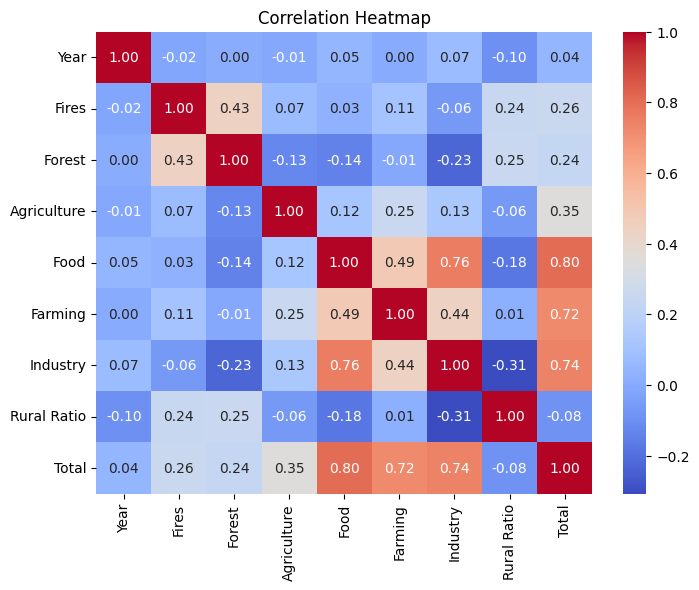

In [128]:
correlation_matrix = df_new.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [100]:
correlation_matrix

,Year,Fires,Forest,Agriculture,Food,Farming,Industry,Rural Ratio,Total
Year,1.000000,-0.020668,0.004095,-0.008379,0.048980,0.001425,0.072042,-0.097528,0.044962
Fires,-0.020668,1.000000,0.432842,0.074644,0.033132,0.109915,-0.064327,0.244396,0.255087
Forest,0.004095,0.432842,1.000000,-0.126334,-0.141987,-0.011110,-0.226942,0.251299,0.238350
Agriculture,-0.008379,0.074644,-0.126334,1.000000,0.116190,0.250007,0.132615,-0.064023,0.352200
Food,0.048980,0.033132,-0.141987,0.116190,1.000000,0.488024,0.758199,-0.179856,0.803115
Farming,0.001425,0.109915,-0.011110,0.250007,0.488024,1.000000,0.441657,0.014987,0.722251
Industry,0.072042,-0.064327,-0.226942,0.132615,0.758199,0.441657,1.000000,-0.308115,0.741641
Rural Ratio,-0.097528,0.244396,0.251299,-0.064023,-0.179856,0.014987,-0.308115,1.000000,-0.084406
Total,0.044962,0.255087,0.238350,0.352200,0.803115,0.722251,0.741641,-0.084406,1.000000


In [102]:
a = high_correlation = []
b = medium_high_correlation = []
c = medium_low_correlation = []
d = low_correlation = []

for key, value in correlation_matrix.items():
    for idx, val in enumerate(value):
        if abs(val) >= 0.7:
            high_correlation.append((key, list(correlation_matrix.keys())[idx]))
        elif 0.5 <= abs(val) < 0.7:
            medium_high_correlation.append((key, list(correlation_matrix.keys())[idx]))
        elif 0.3 <= abs(val) < 0.5:
            medium_low_correlation.append((key, list(correlation_matrix.keys())[idx]))
        else:
            low_correlation.append((key, list(correlation_matrix.keys())[idx]))

# 결과 출력
a = real_high_correlation = []
for j in  high_correlation:
    if j[0] != j[1]:
        a.append(j)
print("High Correlation (>= 0.7):", a)
print("Medium High Correlation (0.5 <= x < 0.7):", medium_high_correlation)
print("Medium Low Correlation (0.3 <= x < 0.5):", medium_low_correlation)
print("Low Correlation (< 0.3):", low_correlation)
print(len(a), len(b), len(c), len(d))

High Correlation (>= 0.7): [('Food', 'Industry'), ('Food', 'Total'), ('Farming', 'Total'), ('Industry', 'Food'), ('Industry', 'Total'), ('Total', 'Food'), ('Total', 'Farming'), ('Total', 'Industry')]
Medium High Correlation (0.5 <= x < 0.7): []
Medium Low Correlation (0.3 <= x < 0.5): [('Fires', 'Forest'), ('Forest', 'Fires'), ('Agriculture', 'Total'), ('Food', 'Farming'), ('Farming', 'Food'), ('Farming', 'Industry'), ('Industry', 'Farming'), ('Industry', 'Rural Ratio'), ('Rural Ratio', 'Industry'), ('Total', 'Agriculture')]
Low Correlation (< 0.3): [('Year', 'Fires'), ('Year', 'Forest'), ('Year', 'Agriculture'), ('Year', 'Food'), ('Year', 'Farming'), ('Year', 'Industry'), ('Year', 'Rural Ratio'), ('Year', 'Total'), ('Fires', 'Year'), ('Fires', 'Agriculture'), ('Fires', 'Food'), ('Fires', 'Farming'), ('Fires', 'Industry'), ('Fires', 'Rural Ratio'), ('Fires', 'Total'), ('Forest', 'Year'), ('Forest', 'Agriculture'), ('Forest', 'Food'), ('Forest', 'Farming'), ('Forest', 'Industry'), ('For

### MLR 학습

In [106]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

X = df.iloc[:,1:-1]
X = sm.add_constant(X)
y = df.iloc[:,0]

result = sm.OLS(y,X)
result = result.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     286.1
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:28:43   Log-Likelihood:                -2569.5
No. Observations:                4121   AIC:                             5157.
Df Residuals:                    4112   BIC:                             5214.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -68.8321      1.603    -42.931      

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X = df.drop('Temperature', axis=1)
y = df['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Adjusted R^2 값 계산
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)

print(f'r2 : {r2}')
print(f'adjusted_r2 : {adjusted_r2}')

r2 : 0.37446805429407826
adjusted_r2 : 0.3698798004135947


In [95]:
# calculate residuals
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

Assumption : Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


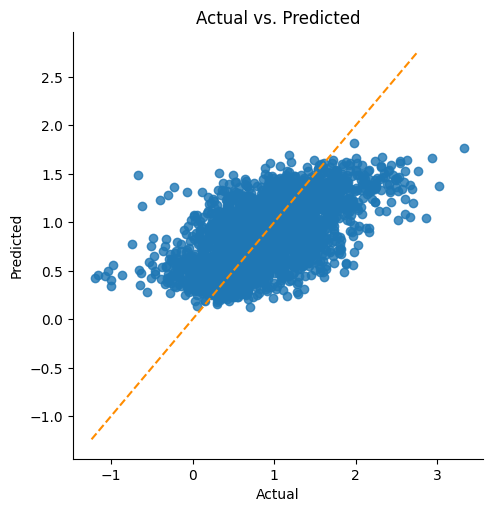

In [96]:
# Linear assumption
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption : Linear Relationship between the Target and the Feature', '\n')

    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()
linear_assumption(model,X_train,y_train) #model, 입력변수, 출력변수

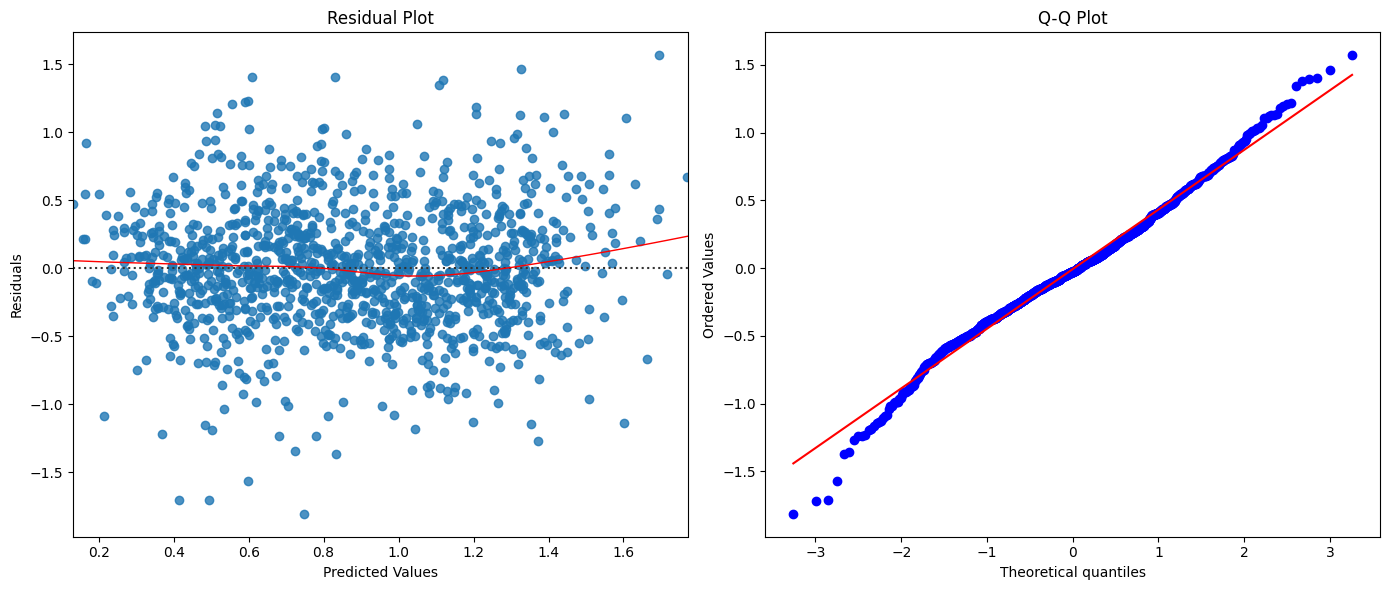

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Residuals 계산
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()


### 모델 성능평가

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


def a(num):
    return round(num,4)

mae, mape, rmse = map(a, (mae, mape, rmse))

performance_data = {
    'RMSE': rmse,
    'MAE': mae,
    'MAPE': mape
}

performance_df = pd.DataFrame(performance_data, index=['CO2_MLR'])

# 결과 확인
performance_df

,RMSE,MAE,MAPE
CO2_MLR,0.4404,0.3346,138.2199


In [ ]:
df3 = pd.read_csv("/content/Agrofood_co2_emission.csv")
df3 = df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 31 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             4546 non-null   object 
 1   Year                             4546 non-null   int64  
 2   Savanna fires                    4546 non-null   float64
 3   Forest fires                     4546 non-null   float64
 4   Crop Residues                    4546 non-null   float64
 5   Rice Cultivation                 4546 non-null   float64
 6   Drained organic soils (CO2)      4546 non-null   float64
 7   Pesticides Manufacturing         4546 non-null   float64
 8   Food Transport                   4546 non-null   float64
 9   Forestland                       4546 non-null   float64
 10  Net Forest conversion            4546 non-null   float64
 11  Food Household Consumption       4546 non-null   float64
 12  Food Retail        

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

X = df3.iloc[:,2:-6]
X = sm.add_constant(X)
y = df3.iloc[:,-1]

result = sm.OLS(y,X)
result = result.fit()
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     Average Temperature   R-squared:                       0.040
Model:                             OLS   Adj. R-squared:                  0.035
Method:                  Least Squares   F-statistic:                     8.197
Date:                 Fri, 29 Mar 2024   Prob (F-statistic):           2.65e-27
Time:                         01:31:51   Log-Likelihood:                -3885.2
No. Observations:                 4546   AIC:                             7818.
Df Residuals:                     4522   BIC:                             7972.
Df Model:                           23                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------


In [23]:
df = pd.read_csv("/content/Agrofood_co2_emission.csv")

### 연도에 따른 온도변화량과 CO2 배출량

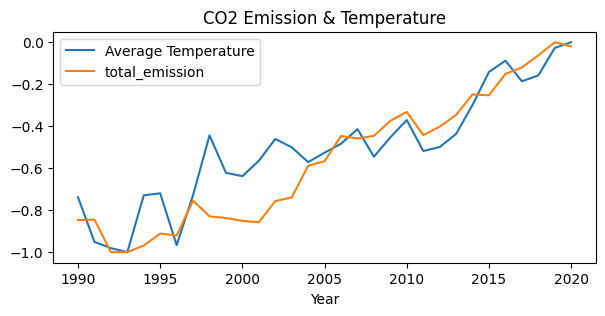

In [8]:
#연도에 따른 온도변화량과 CO2 배출량
def normalizer(df):
    norm = (df - df.max()) / (df.max() - df.min())
    return norm

temp_emission = df.groupby("Year").agg({"Average Temperature": "mean", "total_emission": "mean"})
norm_temp = normalizer(temp_emission)


norm_temp.plot(figsize=(7, 3))
plt.title("CO2 Emission & Temperature")
plt.show()

In [25]:
#나라를 대륙에 따라 분류
continent_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

def assign_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return None

df["continent"] = df["Area"].apply(assign_continent)

In [50]:
df["population"] = df["Total Population - Male"] + df["Total Population - Female"]

### 인구수 CO2 온도

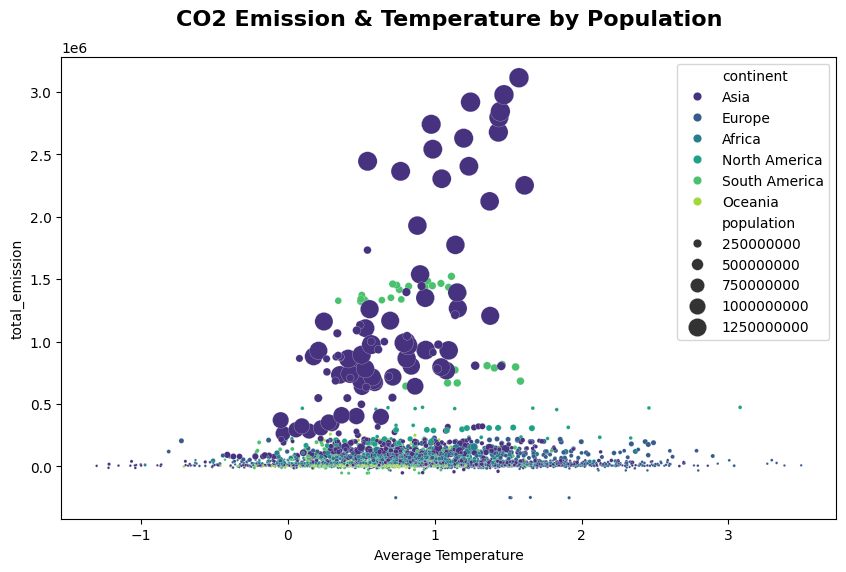

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn으로 산점도 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조절
scatter = sns.scatterplot(data=df, x="Average Temperature", y="total_emission",
                          size="population", hue="continent", palette="viridis", sizes=(3, 200))

# 제목 설정
scatter.set_title('CO2 Emission & Temperature by Population\n', fontsize=16, fontweight='bold')

# 범례 위치 조절
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.show()


In [53]:
asia_df = df[df['continent'] == 'Asia']

### 아시아 데이터셋

In [60]:
asia_df = asia_df.dropna()
asia_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 279 to 6900
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             872 non-null    object 
 1   Year                             872 non-null    int64  
 2   Savanna fires                    872 non-null    float64
 3   Forest fires                     872 non-null    float64
 4   Crop Residues                    872 non-null    float64
 5   Rice Cultivation                 872 non-null    float64
 6   Drained organic soils (CO2)      872 non-null    float64
 7   Pesticides Manufacturing         872 non-null    float64
 8   Food Transport                   872 non-null    float64
 9   Forestland                       872 non-null    float64
 10  Net Forest conversion            872 non-null    float64
 11  Food Household Consumption       872 non-null    float64
 12  Food Retail        

###특정 변수 선택 후 MLR 재구축

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_columns = ['Year', 'Forest', 'Agriculture', 'Farming', 'Industry', 'Rural Ratio']
y_column = 'Temperature'

X = df[X_columns]
y = df[y_column]

# 데이터셋 분할: 학습 데이터셋 70%, 테스트 데이터셋 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 다중선형회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터셋을 사용한 예측
y_pred = model.predict(X_test)

# Adjusted R^2 값 계산
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)

print(f'r2 : {r2}')
print(f'adjusted_r2 : {adjusted_r2}')

r2 : 0.3774892582712257
adjusted_r2 : 0.37445262050669503


In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def a(num):
    return round(num,4)

mae, mape, rmse = map(a, (mae, mape, rmse))

performance_data = {
    'RMSE': rmse,
    'MAE': mae,
    'MAPE': mape
}

performance_df = pd.DataFrame(performance_data, index=['CO2_MLR'])
performance_df

,RMSE,MAE,MAPE
CO2_MLR,0.4404,0.3346,138.2199


### Feature Selection을 비롯한 Data PreProcessing 이후 모델 구축

In [122]:
df = pd.read_csv("/content/Agrofood_co2_emission.csv")

In [124]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
selector=SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X,y)

# Get the selected feature indices
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[feature_indices]

# Create a new DataFrame with only the selected features
selected_data = df[selected_features]
# Print the selected features
print(selected_features)

Index(['Year', 'Food Transport', 'Food Household Consumption', 'Food Retail',
       'Food Packaging', 'Food Processing', 'IPPU', 'Fires in organic soils',
       'Fires in humid tropical forests', 'total_emission'],
      dtype='object')


In [125]:
#scaling using standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_ss=ss.fit_transform(X)

In [126]:
#Performing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_ss,y,test_size=0.2,random_state=0)

In [127]:
#linear regression
mr=LinearRegression()
mr.fit(X_train,y_train)
y_pred=mr.predict(X_test)
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 0.3820875990562988
mean squared error: 0.2630397268143251
root mean squared error: 0.5128739872661949
r2-score: 0.37501844103678406
